<a href="https://colab.research.google.com/github/IsokGta7/IsokGta7.github.io/blob/main/Notebooks/03-Pr%C3%A1ctica_Guthenberg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Práctica en clase</h1>

<h2>Topic Modelling</h2>

En esta práctica descubriremos los tópicos presentes en libros. Usaremos un [dataset](https://www.kaggle.com/datasets/mateibejan/15000-gutenberg-books) del proyecto Gutenberg.

La práctica se divide en dos partes:

1. Trabajo en paraja en clase: Se entrega hoy. El objetivo es determinar el tópico de un libro aleatorio usando limpieza de texto, preprocesamiento y nubes de palabras.
2. Presentación en clase: Se presenta mañana. Aplicar las técnicas que mejor te funcionaron a nuevos documentos aleatorios y determinar sus tópicos. En la presentación describir las técnicas usadas, mostrar las nubes de palabras y comparar con los tópicos *reales*.



1. Bajar el dataset de Google Drive

In [1]:
!gdown 1Pm0W_mXtH7AcHJAE1O6_39oaOQj4fUhK

Downloading...
From (original): https://drive.google.com/uc?id=1Pm0W_mXtH7AcHJAE1O6_39oaOQj4fUhK
From (redirected): https://drive.google.com/uc?id=1Pm0W_mXtH7AcHJAE1O6_39oaOQj4fUhK&confirm=t&uuid=24647c04-26cb-4a22-acbf-1eb121dc8022
To: /content/gutenberg_data_1000_simple.csv
100% 468M/468M [00:10<00:00, 45.8MB/s]


2. Instalar el módulo wordcloud

In [2]:
!pip install -qq wordcloud

3. Leer el dataset

In [3]:
import pandas as pd

data_df = pd.read_csv('/content/gutenberg_data_1000_simple.csv',index_col=0)

4. Leer un documento aleatorio

In [4]:
import numpy as np

idx = np.random.choice(data_df.index.to_list(),size=1)
text = data_df.loc[idx]['Text'].values[0]

In [5]:
print(text)

and the Online Distributed Proofreading Team A DOG OF FLANDERS By Louisa De La Ramê (Óuida) _Illustrated In Color By_ Maria L. Kirk ILLUSTRATIONS NELLO, AWAKENED FROM HIS SLEEP, RAN TO HELP WITH THE REST THEN LITTLE NELLO TOOK HIS PLACE BESIDE THE CART NELLO DREW THEIR LIKENESS WITH A STICK OF CHARCOAL THE PORTALS OF THE CATHEDRAL WERE UNCLOSED AFTER THE MIDNIGHT MASS A DOG OF FLANDERS A STORY OF NÖEL [Illustration] Nello and Patrasche were left all alone in the world. They were friends in a friendship closer than brotherhood. Nello was a little Ardennois--Patrasche was a big Fleming. They were both of the same age by length of years, yet one was still young, and the other was already old. They had dwelt together almost all their days: both were orphaned and destitute, and owed their lives to the same hand. It had been the beginning of the tie between them, their first bond of sympathy; and it had strengthened day by day, and had grown with their growth, firm and indissoluble, until th

Longitud aproximada de palabras

In [6]:
len(text.split())

14168

# 1. Trabajo en clase

0. Guarda el texto con el que vas a trabajar en un archivo para que puedas seguir trabajando con el mismo texto durante todo este trabajo.
1. Generar una nube de palabras con el texto crudo.
2. Tokenizar el texto con spacy, quitar stopwords y signos de puntuación, generar una nube de palabras con este texto limpio.
3. Adicionalmente, lematizar el texto y generar otra nube de palabras.

Usando las nubes de palabras, ¿puedes determinar el tema/tópico del libro?

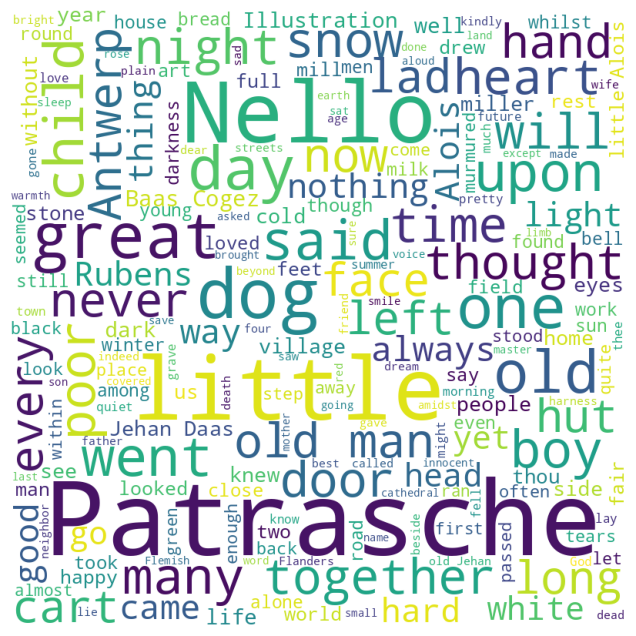

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
#Importamos las librerias necesarias
import re
import spacy

#Cargamos el modelo
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    #Quitamos Citas
    text = re.sub(r'\[\d+\]', '', text)

    #Quitamos vacios
    text = re.sub(r'\n', ' ', text)

    #Quitamos parentesis y comillas
    text = re.sub(r'\".*?\"', '', text)
    text = re.sub(r'\(.*?\)', '', text)

    #Quitamos puntuacion
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()
    text = text.replace('\n', ' ')

    return text

def process_with_spacy(text):
    #Tokenizamos
    doc = nlp(text)

    #Lematizamos y filtramos puntuacion
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct]

    #Re pegamos tokens
    return ' '.join(tokens)


print("Original:")
print(text)
print("\n" + "="*80 + "\n")

#Limpio
cleaned_text = clean_text(text)
print("Limpio sin tokenizar:")
print(cleaned_text)
print("\n" + "="*80 + "\n")

#Spacy
spacy_processed = process_with_spacy(cleaned_text)
print("Spacy:")
print(spacy_processed)
print("\n" + "="*80 + "\n")


Original:
and the Online Distributed Proofreading Team A DOG OF FLANDERS By Louisa De La Ramê (Óuida) _Illustrated In Color By_ Maria L. Kirk ILLUSTRATIONS NELLO, AWAKENED FROM HIS SLEEP, RAN TO HELP WITH THE REST THEN LITTLE NELLO TOOK HIS PLACE BESIDE THE CART NELLO DREW THEIR LIKENESS WITH A STICK OF CHARCOAL THE PORTALS OF THE CATHEDRAL WERE UNCLOSED AFTER THE MIDNIGHT MASS A DOG OF FLANDERS A STORY OF NÖEL [Illustration] Nello and Patrasche were left all alone in the world. They were friends in a friendship closer than brotherhood. Nello was a little Ardennois--Patrasche was a big Fleming. They were both of the same age by length of years, yet one was still young, and the other was already old. They had dwelt together almost all their days: both were orphaned and destitute, and owed their lives to the same hand. It had been the beginning of the tie between them, their first bond of sympathy; and it had strengthened day by day, and had grown with their growth, firm and indissoluble

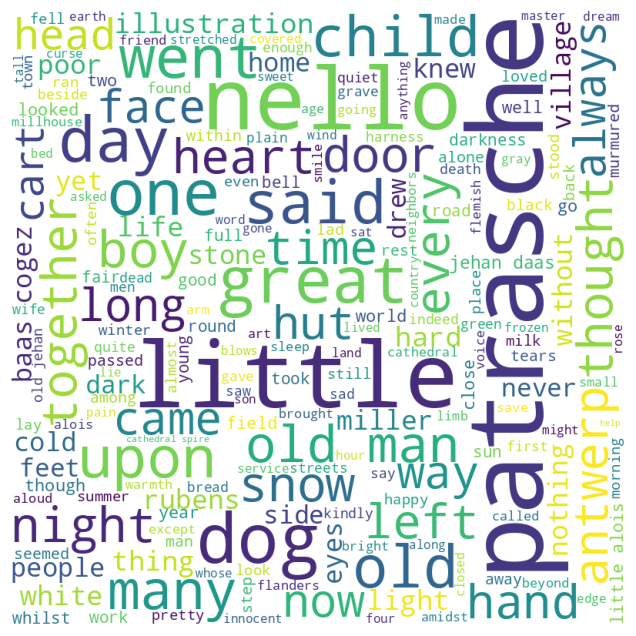

In [9]:
wordcloudLimpio = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(cleaned_text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloudLimpio)
plt.axis("off")
plt.show()

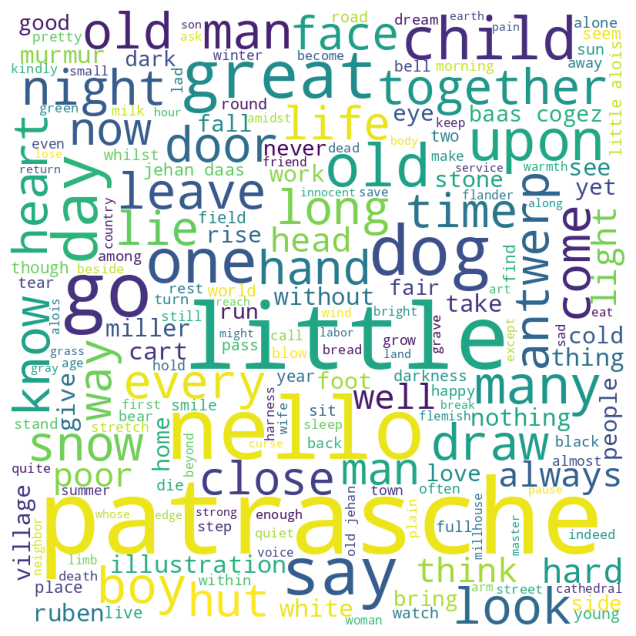

In [10]:
wordcloudSpicey = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(spacy_processed)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloudSpicey)
plt.axis("off")
plt.show()

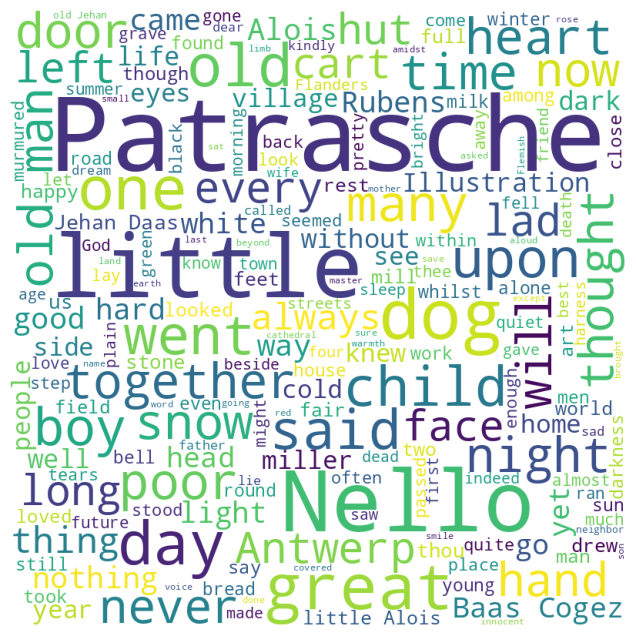

In [11]:
wordcloudCrud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloudCrud)
plt.axis("off")
plt.show()

#2. Trabajo adicional para presentación

Con el mismo texto que trabajaron en clase prueben estrategias de preprocesamiento adicionales y discutan si producen mejores resultados.

* Eliminar stopwords, puntuaciones y símbolos. Lematizar el texto. Hacer la nube de palabras.
* Eliminar stopwords, puntuaciones y símbolos. Quedarse solamente con los adjetivos. Hacer la nube de palabras.
* Eliminar stopwords, puntuaciones y símbolos. Quedarse solamente con los sustantivos. Hacer la nube de palabras.
* Eliminar stopwords, puntuaciones y símbolos. Quedarse solamente con los verbos. Hacer la nube de palabras.
* **Estrategia libre**. Hacer la nube de palabras.

Al final, elegir una de estas estrategias (estas 5 y las de la práctica en clase). Recuerda que el objetivo es que la nube de palabras correspondiente te ayude a identificar el tópico del documento.




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Estrategia 1: Lematización básica:
online distribute proofreading team dog flander louisa de la ramê illustrate color maria l kirk illustration nello awaken sleep run help rest little nello take place beside cart nello draw likeness stick charcoal portal cathedral unclose midnight mass dog flander story nöel illustration nello patrasche leave alone world friend friendship close brotherhood nello little ardennoispatrasche big fleming age length year yet one still young already old dwelt together almost day orphan destitute owe life hand beginning tie first bond sympathy strengthen day day grow growth firm indissoluble love one another greatly home little hut edge little villagea flemish village league antwerp set amidst flat breadth pasture cornland long line poplar alder bend breeze edge great canal run score house homestead shutter bright green skyblue roof rosere black white wall whitewash shine sun like snow centre village stand windmill place little mossgrown slope landmark level 

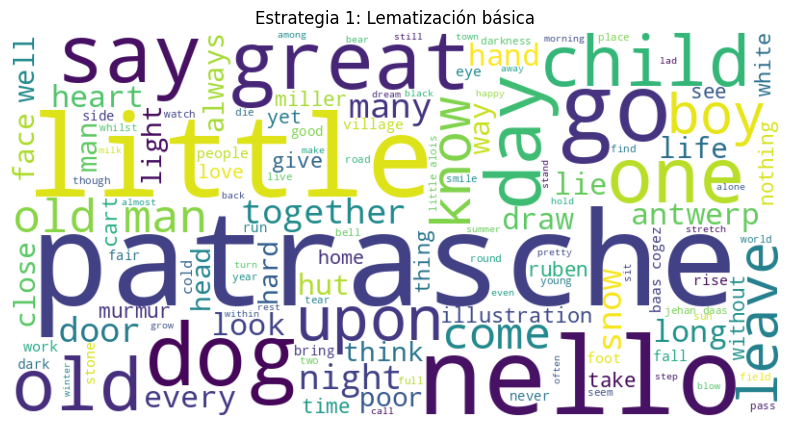


Estrategia 2: Solo adjetivos:
online alone close little big young old destitute first indissoluble little little villagea flemish flat long great bright green black white little mossgrown scarlet rheumatic stiff whole impious religious little old gray conical opposite single strange hollow low integral little melancholy little cathedral great green tideless old poor old old full old additional welcome precious little pet old little poor little humble little clean white small poor poormany enough enough old gentle good beautiful innocent truthful tenderhearted happy dead old large wolflike erect muscular many hard various long weary christian bitter thirteenth accustomed blue green small young sullen brutal full sluggish black strong cruel wretched brutal patient laborious long deadly agony usual straight dusty unlovely full midsummer warm heavy high wayside full bad near blind sore little dusty full sick dead white useless useless leathern savage last fair good fierce strong hard usel

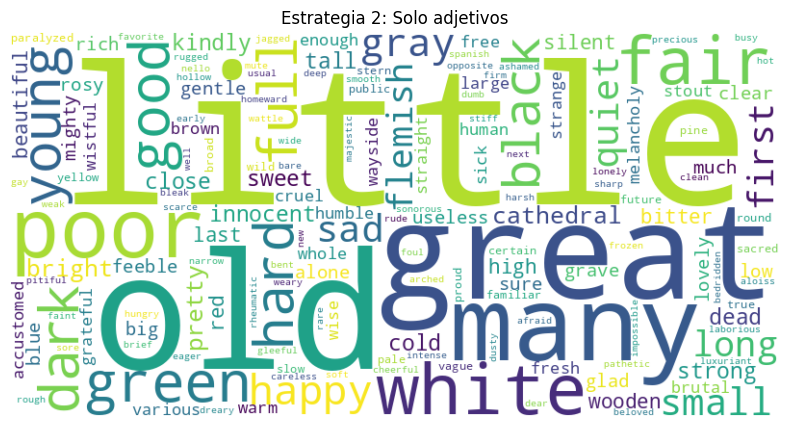


Estrategia 3: Solo sustantivos:
proofreading team dog flander ramê color illustration sleep rest place cart likeness stick charcoal portal cathedral midnight mass dog flander story nöel illustration world friend friendship ardennoispatrasche fleming age length year dwelt day life hand beginning tie bond sympathy day day growth firm one home hut edge village league breadth pasture cornland line poplar alder breeze edge canal score house homestead shutter skyblue roof wall sun snow centre village windmill slope landmark level country round sail infancy century ground wheat soldier napoleon ruddy brown wind weather fit joint age neighborhood grain service mass altar church steeple bell morning noon night sadness bell country part melody sound clock birth dwelt patrasche hut edge village spire northeast plain grass corn changeless sea hut man time soldier war country furrow service wound cripple daas daughter ardenne stavelot legacy twoyearold son man burden nellowhich diminutive nicolast

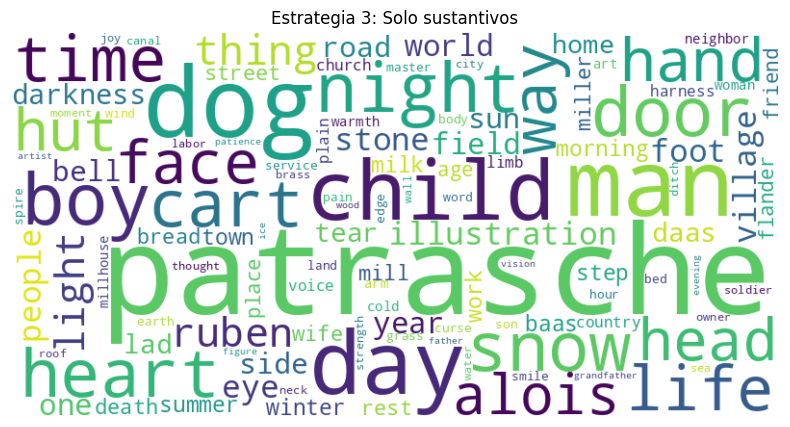


Estrategia 4: Solo verbos:
distribute illustrate awaken run help take draw unclose leave orphan owe strengthen grow love set bend run rosere whitewash shine stand place paint tan go start serve think carry attend perform stand subdue hang seem gain rise seed spread stretch daas remember trample tread bring make reach die leave ill contrive support take become live stand yield pumpkin eat eat reach ask save granary minister go lay die brain stand bow widen work come toil live strain die break bear labor bear feed baptize grow know enter become wander sell deal show illlive heap leave draw lounge smoke stop come bear breed die manage drag lash repay fourfoote go lead pile saunter notice curl round pause drink forbid stop go scorch eat taste stupefy drag stagger foam fall fall motionless give blow drink offer lie find assail brabantoisdeeme go go strip glovescurse strike kick push leave die pick reach get muchendure push louvain stay look enter die steal replace find wander cost make toi

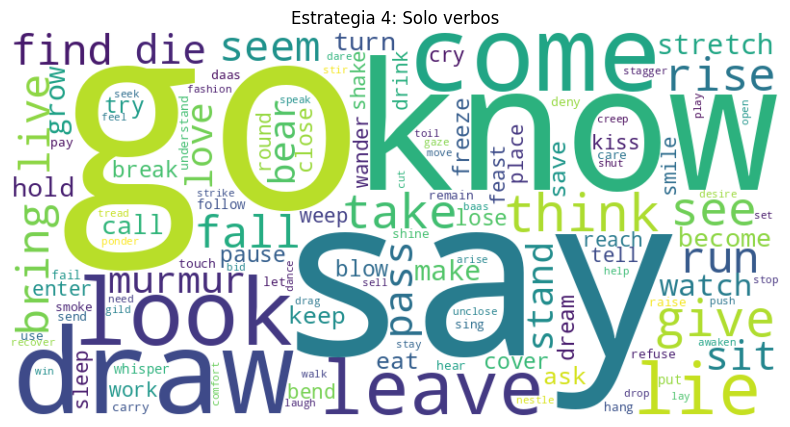


Estrategia 5: Sustantivos y adjetivos frecuentes:
dog flander color illustration sleep rest place cart likeness stick charcoal portal cathedral midnight mass alone world friend friendship close little big fleming age length year young old dwelt day life hand first sympathy firm one home hut edge flemish village league breadth pasture long line poplar great canal house shutter bright green roof black white wall sun snow windmill slope landmark level country round scarlet wheat soldier ruddy brown wind weather rheumatic stiff joint whole service gray church opposite bell morning noon night strange hollow low part sound melancholy clock patrasche spire plain grass corn sea man poor time wound cripple daas full daughter ardenne son burden welcome precious child humble clean small bean chance enough gentle good boy beautiful innocent creature happy crust leave earth gold dead body head foot soul large limb ear leg many generation hard race people beast shaft harness gall heart street paren

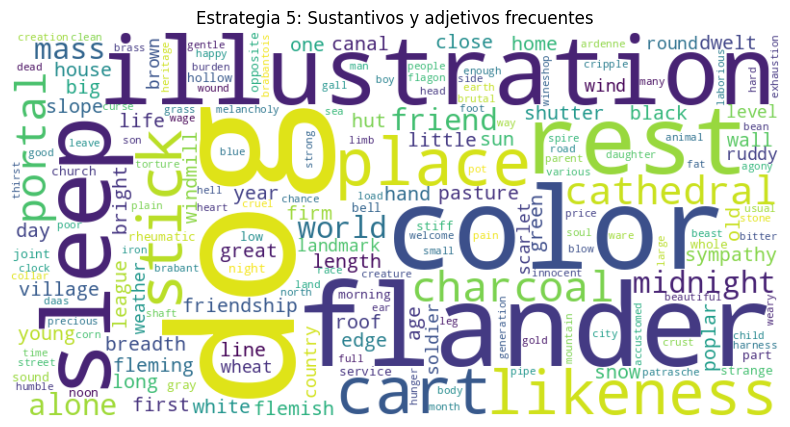

In [16]:
import re
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Cargamos el modelo en español
nlp = spacy.load('en_core_web_sm')
english_stopwords = set(stopwords.words('english'))

def clean_text(text):
    # Quitamos Citas
    text = re.sub(r'\[\d+\]', '', text)
    # Quitamos vacios
    text = re.sub(r'\n', ' ', text)
    # Quitamos parentesis y comillas
    text = re.sub(r'\".*?\"', '', text)
    text = re.sub(r'\(.*?\)', '', text)
    # Quitamos puntuacion
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()
    text = text.replace('\n', ' ')
    return text

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         min_font_size=10).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def estrategia_1(text):
    """Eliminar stopwords, puntuaciones y símbolos. Lematizar el texto."""
    doc = nlp(clean_text(text))
    tokens = [token.lemma_.lower() for token in doc
             if not token.is_punct and token.lemma_.lower() not in english_stopwords]
    return ' '.join(tokens)

def estrategia_2(text):
    """Eliminar stopwords, puntuaciones y símbolos. Solo adjetivos."""
    doc = nlp(clean_text(text))
    tokens = [token.lemma_.lower() for token in doc
             if not token.is_punct and token.lemma_.lower() not in english_stopwords
             and token.pos_ == 'ADJ']
    return ' '.join(tokens)

def estrategia_3(text):
    """Eliminar stopwords, puntuaciones y símbolos. Solo sustantivos."""
    doc = nlp(clean_text(text))
    tokens = [token.lemma_.lower() for token in doc
             if not token.is_punct and token.lemma_.lower() not in english_stopwords
             and token.pos_ == 'NOUN']
    return ' '.join(tokens)

def estrategia_4(text):
    """Eliminar stopwords, puntuaciones y símbolos. Solo verbos."""
    doc = nlp(clean_text(text))
    tokens = [token.lemma_.lower() for token in doc
             if not token.is_punct and token.lemma_.lower() not in english_stopwords
             and token.pos_ == 'VERB']
    return ' '.join(tokens)

def estrategia_5(text):
    """Estrategia libre: Combinar sustantivos y adjetivos más frecuentes."""
    doc = nlp(clean_text(text))
    tokens = [token.lemma_.lower() for token in doc
             if not token.is_punct and token.lemma_.lower() not in english_stopwords
             and token.pos_ in ['NOUN', 'ADJ']]

    # Nos quedamos con las palabras que aparecen más de una vez
    word_freq = Counter(tokens)
    filtered_tokens = [word for word, freq in word_freq.items() if freq > 1]
    return ' '.join(filtered_tokens)

def process_all_strategies(text):
    strategies = [
        (estrategia_1, "Estrategia 1: Lematización básica"),
        (estrategia_2, "Estrategia 2: Solo adjetivos"),
        (estrategia_3, "Estrategia 3: Solo sustantivos"),
        (estrategia_4, "Estrategia 4: Solo verbos"),
        (estrategia_5, "Estrategia 5: Sustantivos y adjetivos frecuentes")
    ]

    for strategy_func, title in strategies:
        processed_text = strategy_func(text)
        print(f"\n{title}:")
        print(processed_text)
        create_wordcloud(processed_text, title)

process_all_strategies(text)

Ahora, consideraremos 5 documentos adicionales aleatorios.

In [ ]:
idxs = np.random.choice(data_df.index.to_list(),size=5)
print(idxs)
texts = list(data_df.loc[idx]['Text'].values)

[ 66 816  28 311 290]


0. Imprime los índices de los textos con los que trabajaste.
1. Aplica la estrategia que tú consideras que dió mejores resultados en el texto anterior a cada uno de estos 5 textos y genera una nube de palabras con cada uno de los textos.
2. Determina, el tópico de cada documento.
3. En clase, presentarán las nubes de palabras (una por cada uno de estos 5 nuevos documentos) y mencionarán brevemente la estrategia de preprocesamiento usada. La presentación será muy breve, máximo 3 minutos.